# Project 5 - We rate Dogs Data Wrangling Exercise

## Table of Contents
- [Python Libraries Used](#Python-Libraries-Used)
- [Data Wrangling](#Data-Wrangling)
    - [Data Gathering](#Data-Gathering)
    - [Data Assessing](#Data-Assessing)
    - [Data Cleaning](#Data-Cleaning)
    - [Storing Data](#Storing-Data)
- [Data Analysis](#Data-Analysis)
    - [Relationship between the dog rating and likes](#Relationship-between-the-dog-rating-and-likes)
    - [Frequency that the dog predicter AI guesses something that is not a dog on the first guess](#Frequency-that-the-dog-predicter-AI-guesses-something-that-is-not-a-dog-on-the-first-guess)
    - [Analysis of factors affecting the number of retweets](#Analysis-of-factors-affecting-the-number-of-retweets)
    - [Most Common Dog Name](#Most-Common-Dog-Name)

## Python Libraries Used

In [560]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import timeit
import json
from pprint import pprint
import re
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Data Wrangling

### Data Gathering

>Within this project there are two files to be gathered. The first of these `twitter_archive_enhanced.csv` is provided and has been manually downloaded. The second file contains the dogs image predictions (`image_predictions.tsv`), this shall be programatically downloaded from this [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv).

#### Programatically downloading `image_predictions.tsv`

In [662]:
# Create Directory if it doens't already exist (Not 100% necessary as only one file being made but good to practice)
folder_name = 'dog_images'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [663]:
#store url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [664]:
#Use requests to download file and save in folder
response = requests.get(url)
file_name = url.split('/')[-1]
with open(os.path.join(folder_name, file_name), mode = 'wb') as file:
         file.write(response.content)

In [665]:
#Import both files and save as df
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
dog_images = pd.read_csv('dog_images\\image-predictions.tsv', sep = '\t')

The above code downloads and saves the tsv file into the relevent file

#### Twitter API query

In [666]:
#Create list of tweet_ids not including replies or retweets
tweet_ids = twitter_archive['tweet_id'][(twitter_archive.in_reply_to_status_id.isnull())
                                        & (twitter_archive.retweeted_status_id.isnull())]
tweet_ids.shape[0]

2097

In [667]:
#Code to create an API object
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [668]:
#Code to create an API object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

with open('tweet_json.txt','w') as outfile:
    for ID in tweet_ids:
        start = timeit.timeit()
        try:
            tweet = api.get_status(ID)
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            continue
        end = timeit.timeit()
        print(end - start)

0.005835200001456542
0.007146199999624514
0.010344700000132434
-0.006252899998798966
0.03104879999955301
-0.0012132000010751653
0.008634700001493911
-0.00658099999964179
0.010348699999667588
0.0029559000013250625
-0.005323999999745865
0.002726299999267212
0.003255100000387756
0.00501559999975143
-0.010775200000352925
0.017924899999343324
0.010600300001897267
0.007465200000297045
-0.007223999997222563
0.011508200001117075
0.00013840000065101776
-0.002935599999545957
0.0201933000007557
0.0057222999985242495
-0.0009638999999879161
0.006471500000770902
-0.006258900000830181
0.02513829999952577
0.009428400000615511
-0.005120699999679346
0.020402500000272994
-0.010474799999428797
0.0043525999990379205
0.00410349999947357
0.0062503000008291565
0.00626410000040778
0.010043700000096578
0.0015091999994183425
0.00997579999784648
0.018866000000343774
-0.009522100001049694
-0.029670500000065658
-0.04197589999967022
-0.005740099999457016
0.0025829000005614944
-0.006022999999913736
0.0088143999983003

0.0018502999992051627
-0.0005536999997275416
-0.00036830000135523733
0.003394000001208042
-0.005700899999283138
0.013448600000629085
0.00423169999885431
-0.00045649999992747325
0.016756899998654262
-0.011011700000381097
-0.006327200000669109
0.016666899999108864
-0.004997400003048824
-0.0021887999992031837
0.0006164999995235121
-0.0022273999984463444
-0.002405999999609776
0.001827199999752338
0.00261069999942265
0.009612300000299001
0.000497499999255524
-0.001796100001229206
-0.002269799999339739
-0.0021740000011050142
0.010559199999988778
-0.004452600000149687
0.0032731999999668915
0.00039600000127393287
0.005791999999928521
-0.0025759999989531934
0.004074199998285621
0.0016327000012097415
0.0016450999992230209
-0.004112299999178504
-0.005703200000425568
-0.0050746000015351456
-0.011153299999932642
0.010846100001799641
0.008626299999377807
-0.018323199999940698
-0.0015477999986615032
0.006241600001885672
0.007210699999632197
-0.004645299999538111
-0.006391299999449984
-0.0026005999989

0.00027659999977913685
0.001622699997824384
-0.0020794999982172158
-0.0005435999992187135
0.01015469999947527
0.0052753999989363365
0.0007847000015317462
0.0010217999988526572
-0.004615500001818873
0.0008909999996831175
-0.00290099999983795
-0.008348299999852316
0.013118799999574549
0.008104200000161654
-0.010192699999606702
-0.00211219999982859
-0.0008744999995542457
-0.006464499998401152
-0.0017778000019461615
-0.00456089999897813
-0.005212900001424714
0.003937499999665306
0.003957999999329331
0.00590360000023793
0.0020072999996045837
-0.00038920000042708125
-0.01871170000231359
0.017640900001424598
-0.012607299999217503
-0.00931029999992461
0.014309599999251077
-0.01500080000005255
-0.007016699999439879
-0.00131389999842213
-0.004479000001083477
-0.0020215999993524747
0.005998200000249199
-0.01714729999912379
-0.004920700001093792
0.0045695000007981434
-0.01231770000049437
-0.03291639999952167
-0.001592799999343697
0.011139800002638367
0.004067300002134289
-0.000353900000845897
-0.0

In [755]:
#Iterate through each line of json file to convert to python dictionary
df_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:
    for line in json_file:
        data = json.loads(line)
        created_at = data['created_at']
        text = data['text']
        tweet_id = data['id']
        retweet_count= data['retweet_count']
        likes = data['favorite_count']
        df_list.append({'created_at': created_at, 
                            'text': text,
                            'tweet_id': tweet_id,
                            'retweet_count': retweet_count,
                            'likes': likes})

In [756]:
#convert dictionary into pandas dataframe
api_data = pd.DataFrame(df_list, columns = ['tweet_id', 'created_at', 'likes', 'retweet_count'])
api_data.shape[0]

894

In [757]:
#Display three inputs for clarity
#twitter_archive
#dog_images
#api_data

### Data Assessing

> In this section we'll undertake a visual a programtic assessment of the data to identify eight quality issues and two tidiness issues. We'll start with a visual assessment withing this notebook using a sample of ten rows from each of our three dataframes.

#### Visual Quality Assessments

##### Quality Issues within `twitter_archive` *(visual assessment)*
- Source column url not useable in current format
- Some names state '**a**' when sentence starts "**This is a...**"

In [758]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


##### Quality Issues within `dog_images` *(visual assessment)*
- No quality issues identifed with `dog_images` at this stage

In [759]:
dog_images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1278,750101899009982464,https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg,2,golden_retriever,0.316704,True,llama,0.174269,False,Labrador_retriever,1.473640e-01,True
417,674024893172875264,https://pbs.twimg.com/media/CVqeEKLW4AA1wXH.jpg,1,Pomeranian,0.648500,True,Pekinese,0.339835,True,Persian_cat,6.448460e-03,False
1380,765222098633691136,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,dalmatian,0.556595,True,whippet,0.151047,True,American_Staffordshire_terrier,9.643550e-02,True
220,670086499208155136,https://pbs.twimg.com/media/CUygHhFXAAAwNXv.jpg,1,German_short-haired_pointer,0.273492,True,Staffordshire_bullterrier,0.132944,True,bluetick,1.245620e-01,True
78,667443425659232256,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,goose,0.980815,False,drake,0.006918,False,hen,5.255170e-03,False
149,668636665813057536,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,komondor,0.999956,True,llama,0.000043,False,ram,2.160900e-07,False
1573,795400264262053889,https://pbs.twimg.com/media/CwnUUGTWIAE8sFR.jpg,2,golden_retriever,0.925494,True,Labrador_retriever,0.059241,True,tennis_ball,4.495340e-03,False
1414,771014301343748096,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,1,meerkat,0.202335,False,doormat,0.111790,False,macaque,8.892530e-02,False
953,705102439679201280,https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg,1,collie,0.457672,True,chow,0.279101,True,Pomeranian,7.692230e-02,True
1735,821765923262631936,https://pbs.twimg.com/media/C2d_vnHWEAE9phX.jpg,1,golden_retriever,0.980071,True,Labrador_retriever,0.008758,True,Saluki,1.805950e-03,True


##### Quality Issues within `api_data` *(visual assessment)*
- No quality issues identifed with `api_data` at this stage

In [760]:
api_data.sample(10)

,tweet_id,created_at,likes,retweet_count
816,744709971296780288,Mon Jun 20 01:54:27 +0000 2016,5664,1576
756,750086836815486976,Mon Jul 04 22:00:12 +0000 2016,2205,543
485,793165685325201412,Mon Oct 31 19:00:10 +0000 2016,9730,2879
309,825026590719483904,Fri Jan 27 17:04:02 +0000 2017,6446,1295
888,733482008106668032,Fri May 20 02:18:32 +0000 2016,3157,957
778,748568946752774144,Thu Jun 30 17:28:39 +0000 2016,2224,674
514,788412144018661376,Tue Oct 18 16:11:17 +0000 2016,16047,5447
187,847157206088847362,Wed Mar 29 18:43:12 +0000 2017,19858,5832
802,746542875601690625,Sat Jun 25 03:17:46 +0000 2016,5098,1896
711,756288534030475264,Fri Jul 22 00:43:32 +0000 2016,43493,17737


#### Programatic Assessments

In this sections each of the three dataframes shall be programatically assessed using the following pandas functions
- `.info()`
- `.describe()`
- `.value_counts()` for specific columns of interest

##### Quality Issues within `twitter_archive` *(programatic assessment)*
- Retweets and replies included in data set
- Inconsistent denominators
- `timestamp` has incorrect datatype
- Inconsistency in capatilsation within `name` column
- `tweet_id` column should be string rather than an interger

In [761]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [762]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [763]:
# Checking for duplicated tweets
twitter_archive.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
715360349751484417    1
666817836334096384    1
794926597468000259    1
673705679337693185    1
700151421916807169    1
Name: tweet_id, Length: 2356, dtype: int64

In [764]:
#confirms observation made in visual assessment
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Ronduh       1
this         1
Bobby        1
Kody         1
Severus      1
Name: name, Length: 957, dtype: int64

##### Quality Issues within `dog_images` *(programatic assessment)*
- Inconsistencies in capatilsations within `p1, p2 & p3` columns
- `tweet_id` column should be string rather than an integer

In [765]:
dog_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [766]:
dog_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [767]:
dog_images.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
bookcase                1
handkerchief            1
restaurant              1
ocarina                 1
leaf_beetle             1
Name: p1, Length: 378, dtype: int64

In [768]:
dog_images.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
barbershop              1
canoe                   1
spotlight               1
iPod                    1
umbrella                1
Name: p2, Length: 405, dtype: int64

In [769]:
dog_images.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
nipple                 1
nail                   1
eel                    1
French_horn            1
conch                  1
Name: p3, Length: 408, dtype: int64

##### Quality Issues within `api_data` *(programatic assessment)*
- `created_at` column has incorrect datatype
- `tweet_id` column has incorrect datatype

In [770]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 4 columns):
tweet_id         894 non-null int64
created_at       894 non-null object
likes            894 non-null int64
retweet_count    894 non-null int64
dtypes: int64(3), object(1)
memory usage: 28.1+ KB


In [771]:
api_data.describe()

,tweet_id,likes,retweet_count
count,8.940000e+02,894.000000,894.000000
mean,8.037799e+17,15500.053691,4346.227069
std,4.585997e+16,15105.237250,5820.857679
min,6.885192e+17,890.000000,156.000000
25%,7.612438e+17,6694.750000,1781.250000
50%,8.000798e+17,10998.000000,2866.500000
75%,8.389451e+17,19850.000000,4684.000000
max,8.924206e+17,158024.000000,78719.000000


#### Visual Tidiness Assessments

We can see from looking at `twitter arhive` that the columns `doggo, floofer, pupper and puppo` could be categorised into one column, called `dog type`, therefore this is our first tidiness issue. Secondly `api_data` can be merged through `tweet_id` into the `twitter_archive` dataframe
- Combine `twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']]` columns into one
- Merge `api_data` and `dog_images` into `twitter_archive` dataframe

### Summary of Data Assessment
#### Quality Issues
- Source column url not useable in current format
- Some names state '**a**' when sentence starts "**This is a...**"
- Retweets and replies included in data set, these rows need to be dropped
- Inconsistent denominators which are difficult to evaluate
- `timestamp` has incorrect datatype
- Inconsistency in capatilsation within `name` column
- Inconsistencies in capatilsations within `p1, p2 & p3` columns
- `created_at` column has incorrect datatype
- `tweet_id` columns in both `twitter_archive`, `api_data` and `dog_images` should be string rather than an object
- Drop "an" and "The" from dog name column

#### Tidiness Issues
- Combine `twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']]` columns into one
- Merge `api_data` and `dog_images` into `twitter_archive` dataframe

### Data Cleaning

> In this section we shall work carry out the assessments highlighted in the previous section, first defining, coding and then testing each item. Before starting, we'll create new dataframes to ensure the source data is unchanged:

In [772]:
twitter_archive_clean = twitter_archive.copy()
dog_images_clean = dog_images.copy()
api_data_clean = api_data.copy()

#### 1. Source URL column in `twitter_archive` not usable in current format

##### Define
Use `str.split` to take only text between quotation marks

##### Code

In [773]:
twitter_archive_clean.source = twitter_archive_clean.source.str.extract('(?<=\")(.*?)(?=\")')

##### Test

In [774]:
twitter_archive_clean.source.value_counts()

http://twitter.com/download/iphone              2221
http://vine.co                                    91
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      11
Name: source, dtype: int64

#### 2. Some names within `twitter_archive.name` state '**a**' when sentence starts "**This is a...**"

##### Define

> Following a further visual assessment of the text line from which the names are extracted, lines starting with **"This is a..."** do not appear to contain any names, resultantly, all names stating **"a"** shall be changed to none
>
> Create a `for` loop to iterate through `twitter_achive.names` creating a list with all **"a"** values changed to **"None"**

##### Code

In [775]:
names_clean = []
names = twitter_archive_clean.name
for name in names:
    if name == 'a':
        names_clean.append('None')
    else:
        names_clean.append(name)
        
twitter_archive_clean.name = names_clean

##### Test

In [776]:
twitter_archive_clean.name.value_counts()

None       800
Charlie     12
Lucy        11
Oliver      11
Cooper      11
          ... 
Jaspers      1
Ronduh       1
this         1
Bobby        1
Severus      1
Name: name, Length: 956, dtype: int64

#### 3. Retweets and replies included within `twitter_archive` data set

##### Define

Use `.query` to filter out any retweets and favourites and then resave `twitter_archive_clean`

##### Code

In [777]:
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean.in_reply_to_status_id.isnull())
                                        & (twitter_archive_clean.retweeted_status_id.isnull())]
twitter_archive_clean = twitter_archive_clean.reset_index(drop=True)

##### Test

In [778]:
twitter_archive_clean.in_reply_to_status_id.unique()

array([nan])

In [779]:
twitter_archive_clean.retweeted_status_id.unique()

array([nan])

In [780]:
#Now tested and cleared we can drop these columns
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id', 'in_reply_to_status_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id'], axis = 1)

#### 4. Some denominators not equal to 10 within `twitter_archive.rating_denominator`

> From further visual assessment each dog carries a rating out of 10. When there are multiple dogs within a photo the denominator increases by 10 for each dog on occastions. e.g 20 if 2 dogs are in the photo. Other errors within the denominator column have come from things such as 24/7 and the shop 7/11 being referenced within the tweet. To clean this data the following shall be undertaken:
>
> First take a denominator /10 if it is there, then a factor of 10, if neither of these are available no denominator shall be passed. We shall also reset the numerators within this stage.
>
> Once complete we'll factorise all fractions so they are /10 for easier analysis.

##### Define

- Create for loop using regex to extract values when denominator /10, then denominators that are factors of 10
- Creat loop to factorise numerators and denominators to be /10

##### Code

In [781]:
# Reextract denominators and numerators, specifying only factors of ten
den = []
text = twitter_archive_clean['text']
for line in text:
    try:
        x = (re.findall(r'\d+\/10+s?(?![\w\d])', line)[-1])
        x = x.replace('s', '')
    except:
        try:
            x = (re.findall(r'\d+\/\d+[0]s?(?![\w\d])', line)[-1])
            x = x.replace('s', '')
        except:
            x = ('0/0')
    den.append(x)

len(den)

2097

In [782]:
#Split columns into numerators and denominators
twitter_archive_clean['rat_den'] = den
twitter_archive_clean['rat_num'], twitter_archive_clean['rat_den'] = twitter_archive_clean['rat_den'].str.split('/',1).str

In [783]:
#factorise fractions so they are /10
twitter_archive_clean[['rat_den', 'rat_num']] = twitter_archive_clean[['rat_den', 'rat_num']].astype(int)
den = []
num = []

for i in range(len(twitter_archive_clean)):
    dens = twitter_archive_clean['rat_den'][i]
    nums = twitter_archive_clean['rat_num'][i]
    if dens != 0:
        x = dens / 10
        den.append(dens/x)
        num.append(nums/x)
    else:
        den.append(0)
        num.append(0)
twitter_archive_clean['rat_den'] = den
twitter_archive_clean['rat_num'] = num

In [784]:
#Drop original numerator and denominator columns
twitter_archive_clean = twitter_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1)

##### Test

In [785]:
twitter_archive_clean.rat_den.value_counts()

10.0    2096
0.0        1
Name: rat_den, dtype: int64

In [786]:
#Manually check text where value = 0
twitter_archive_clean[twitter_archive_clean['rat_den'] == 0].text.index

Int64Index([403], dtype='int64')

In [787]:
# We can see from the output that no dog rating was included in this tweet
twitter_archive_clean.iloc[403, 5]

'Sam'

#### 5. Object type within `twitter_archive.timestamp` is incorrect

##### Define
> Use `.astype('datetime64')` to change datatype of column

##### Code

In [788]:
twitter_archive_clean['timestamp'] = twitter_archive_clean.timestamp.astype('datetime64')
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rat_den,rat_num
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,10.0,13.0
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,10.0,13.0
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,10.0,12.0
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,10.0,13.0
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,10.0,12.0


##### Test

In [789]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id         2097 non-null int64
timestamp        2097 non-null datetime64[ns]
source           2097 non-null object
text             2097 non-null object
expanded_urls    2094 non-null object
name             2097 non-null object
doggo            2097 non-null object
floofer          2097 non-null object
pupper           2097 non-null object
puppo            2097 non-null object
rat_den          2097 non-null float64
rat_num          2097 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 196.7+ KB


#### 6. Inconsistency in capiltalisation within `twitter_archive.name` column

##### Define
> Use `.capitalize` to ensure first letter is capitalised throughout

##### Code

In [790]:
twitter_archive_clean.name = twitter_archive_clean.name.str.capitalize()

##### Test

In [791]:
twitter_archive_clean.name.sample(15)

31        Maisey
252     Sunshine
978         Ebby
747         Toby
116         Coco
1126    Ralphson
614         None
603       Finley
909      Charles
643       Gerald
879          Mad
1636      Mollie
1740        None
138        Milky
1374      Brooks
Name: name, dtype: object

#### 7. Inconsistencies in capiltalisation within `dog_images.p1, dog_images.p2 & dog_images.p3` columns

##### Define
> Capitalise the first letter of each item using `.capitalize` to ensure consistency throughout

##### Code

In [792]:
dog_images_clean.p1 = dog_images_clean.p1.str.capitalize()
dog_images_clean.p2 = dog_images_clean.p2.str.capitalize()
dog_images_clean.p3 = dog_images_clean.p3.str.capitalize()

##### Test

In [793]:
dog_images_clean[['p1', 'p2', 'p3']].sample(15)

,p1,p2,p3
665,English_setter,English_springer,Brittany_spaniel
1009,Labrador_retriever,Pomeranian,Golden_retriever
17,Hen,Cock,Partridge
475,Chow,Tibetan_mastiff,Tibetan_terrier
98,Fire_engine,Tow_truck,Jeep
1108,Teddy,Chow,Irish_terrier
1791,Labrador_retriever,Seat_belt,Pug
977,Pug,Llama,French_bulldog
311,Feather_boa,Wig,Wool
889,Mousetrap,Banded_gecko,Common_iguana


#### 8. `api_data.created_at` column has incorrect datatype

##### Define
> Use `.astype('datetime64')` to change datatype of `api_data.created_at` column

##### Code

In [794]:
api_data_clean.created_at = api_data_clean.created_at.astype('datetime64')

##### Test

In [795]:
api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 4 columns):
tweet_id         894 non-null int64
created_at       894 non-null datetime64[ns]
likes            894 non-null int64
retweet_count    894 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 28.1 KB


#### 9. `tweet_id` columns in both `twitter_archive`, `api_data` and `dog_images` should be string rather than an object

##### Define
> Use `.astype('str')` to change datatypes to object rather than interger

##### Code

In [796]:
api_data_clean['tweet_id'] = api_data_clean['tweet_id'].astype('str')
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')
dog_images_clean['tweet_id'] = dog_images_clean['tweet_id'].astype('str')

##### Test

In [797]:
api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 4 columns):
tweet_id         894 non-null object
created_at       894 non-null datetime64[ns]
likes            894 non-null int64
retweet_count    894 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 28.1+ KB


In [798]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id         2097 non-null object
timestamp        2097 non-null datetime64[ns]
source           2097 non-null object
text             2097 non-null object
expanded_urls    2094 non-null object
name             2097 non-null object
doggo            2097 non-null object
floofer          2097 non-null object
pupper           2097 non-null object
puppo            2097 non-null object
rat_den          2097 non-null float64
rat_num          2097 non-null float64
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 196.7+ KB


#### 10. Change names labeled "An" and "The" to "None" within the `twitter_archive` table

##### Define
> Change name values that equal "An" or "The" to "None"

##### Code

In [799]:
incorrect_names = (twitter_archive_clean['name'] == "An") | (twitter_archive_clean['name'] == "The")
twitter_archive_clean['name'][incorrect_names] = "None"

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##### Test

In [800]:
twitter_archive_clean['name'].value_counts()

None       672
Charlie     11
Lucy        11
Oliver      10
Cooper      10
          ... 
Dwight       1
Shaggy       1
Noah         1
Karll        1
Burt         1
Name: name, Length: 952, dtype: int64

In [801]:
twitter_archive_clean[twitter_archive_clean['name'] == "An"]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rat_den,rat_num


In [802]:
twitter_archive_clean[twitter_archive_clean['name'] == "The"]

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rat_den,rat_num


#### 11. Combine `twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']]` columns into one

##### Define

> Merge the above columns into one, keeping the types if there is one, and leaving only one 'None' if there is not. Finally drop the above columns

In [803]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rat_den,rat_num
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,10.0,13.0
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,10.0,13.0
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,10.0,12.0
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,10.0,13.0
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,10.0,12.0


##### Code

In [804]:
if 'doggo' in twitter_archive_clean.columns:
    twitter_archive_clean['dog_type'] = ""
    y = ['doggo', 'floofer', 'pupper', 'puppo']
    twitter_archive_clean['dog_type'] = twitter_archive_clean[twitter_archive_clean.columns
                                                              [(twitter_archive_clean.columns.get_loc('doggo')):
                                                               (twitter_archive_clean.columns.get_loc('puppo')+1)]].apply(
        lambda x: '/'.join(x.dropna().astype(str)), axis=1)
    twitter_archive_clean['dog_type'] = twitter_archive_clean['dog_type'].str.replace("None/", "").str.replace("None", "")
    name_complete = []
    for name in twitter_archive_clean['dog_type']:
        if name == "":
            name_complete.append('None')
        elif name.rfind("/") > 0:
            last_char_index = name.rfind("/")
            new_string = name[:last_char_index]
            name_complete.append(new_string)
        else:
            name_complete.append(name)
    twitter_archive_clean['dog_type'] = name_complete

In [805]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

##### Test

In [806]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rat_den,rat_num,dog_type
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,10.0,13.0,None
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,10.0,13.0,None
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,10.0,12.0,None
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,10.0,13.0,None
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,10.0,12.0,None


In [807]:
twitter_archive_clean.dog_type.value_counts()

None             1761
pupper            221
doggo              73
puppo              23
floofer             9
doggo/pupper        9
doggo/floofer       1
Name: dog_type, dtype: int64

#### 12. Merge `api_data` and `dog_images` into `twitter_archive` dataframe

##### Define
> Use merge function to combine the above dataframes on tweet_id

##### Code

In [808]:
api_data_clean

,tweet_id,created_at,likes,retweet_count
0,892420643555336193,2017-08-01 16:23:56,36569,7786
1,892177421306343426,2017-08-01 00:17:27,31495,5766
2,891815181378084864,2017-07-31 00:18:03,23746,3818
3,891689557279858688,2017-07-30 15:58:51,39895,7956
4,891327558926688256,2017-07-29 16:00:24,38081,8590
...,...,...,...,...
889,733460102733135873,2016-05-20 00:51:30,4226,1290
890,733109485275860992,2016-05-19 01:38:16,50503,16982
891,732732193018155009,2016-05-18 00:39:02,2455,541
892,732726085725589504,2016-05-18 00:14:46,3567,893


In [809]:
twitter_archive_clean = pd.merge(twitter_archive_clean, api_data_clean, on=['tweet_id'], how='left')
twitter_archive_clean = pd.merge(twitter_archive_clean, dog_images_clean, on=['tweet_id'], how='left')

##### Test

In [810]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 23 columns):
tweet_id         2097 non-null object
timestamp        2097 non-null datetime64[ns]
source           2097 non-null object
text             2097 non-null object
expanded_urls    2094 non-null object
name             2097 non-null object
rat_den          2097 non-null float64
rat_num          2097 non-null float64
dog_type         2097 non-null object
created_at       894 non-null datetime64[ns]
likes            894 non-null float64
retweet_count    894 non-null float64
jpg_url          1971 non-null object
img_num          1971 non-null float64
p1               1971 non-null object
p1_conf          1971 non-null float64
p1_dog           1971 non-null object
p2               1971 non-null object
p2_conf          1971 non-null float64
p2_dog           1971 non-null object
p3               1971 non-null object
p3_conf          1971 non-null float64
p3_dog           1971 non-null objec

In [811]:
#drop all columns with any null values in
twitter_archive_clean = twitter_archive_clean.dropna()

In [812]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 0 to 1329
Data columns (total 23 columns):
tweet_id         832 non-null object
timestamp        832 non-null datetime64[ns]
source           832 non-null object
text             832 non-null object
expanded_urls    832 non-null object
name             832 non-null object
rat_den          832 non-null float64
rat_num          832 non-null float64
dog_type         832 non-null object
created_at       832 non-null datetime64[ns]
likes            832 non-null float64
retweet_count    832 non-null float64
jpg_url          832 non-null object
img_num          832 non-null float64
p1               832 non-null object
p1_conf          832 non-null float64
p1_dog           832 non-null object
p2               832 non-null object
p2_conf          832 non-null float64
p2_dog           832 non-null object
p3               832 non-null object
p3_conf          832 non-null float64
p3_dog           832 non-null object
dtypes: datetime64[

### Storing Data

In [813]:
#Save dataframes to sql database
from sqlalchemy import create_engine
engine = create_engine('sqlite:///firstdatabase.db', echo=False)

In [814]:
twitter_archive_clean.to_sql('twitter_archive_master', engine, if_exists = 'replace', index = False)

In [815]:
#Save dataframes as csv files
twitter_archive_clean.to_csv('twitter_archive_master.csv')

## Data Analysis

> In this section we shall use the data within sqlite database created in the previous section to produce three insights into the data. We shall be looking into the following:
> - Relationship between the dog rating and likes
> - Frequency that the dog predicter AI guesses something that is not a dog on the first guess
> - Relationship the following have on the number of retweets:
>      - Dog rating
>      - Dog Type
> - Most common dog breed

### Relationship between the dog rating and likes
> In this section we'll build a simple linear regression model to assess the relationship between the aforementioned parameters and see if it is statistically significant

In [816]:
df = pd.read_sql_query('SELECT rat_num, likes FROM twitter_archive_master', engine)
df.shape[0]

832

In [817]:
#First we'll further clean this data for our purpuses by dropping all null values
df = df.dropna()
df.shape[0]

832

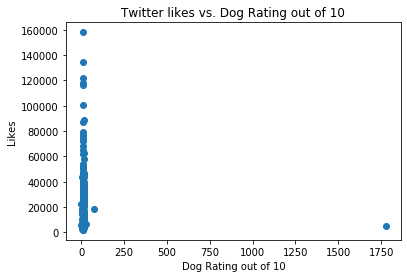

In [818]:
plt.scatter(df['rat_num'], df['likes']);
plt.xlabel('Dog Rating out of 10');
plt.ylabel('Likes');
plt.title('Twitter likes vs. Dog Rating out of 10');

In [819]:
top_perc = df.rat_num.quantile(0.99)
bot_perc = df.rat_num.quantile(0.01)

In [820]:
#To improve data we shall drop the extreme outlier
df = df.drop(df[df['rat_num'] > top_perc].index, axis = 0)
df = df.drop(df[df['rat_num'] < bot_perc].index, axis = 0)
df

,rat_num,likes
0,13.0,36569.0
1,13.0,31495.0
2,12.0,23746.0
3,13.0,39895.0
4,12.0,38081.0
...,...,...
827,11.0,4226.0
828,12.0,50503.0
829,12.0,2455.0
830,11.0,3567.0


In [821]:
#Now to set up the simple linear regression model
df['intercept'] = 1
x = sm.OLS(df['likes'], df[['intercept', 'rat_num']])

In [822]:
results = x.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     142.9
Date:                Fri, 28 Feb 2020   Prob (F-statistic):           1.84e-30
Time:                        13:55:04   Log-Likelihood:                -8999.1
No. Observations:                 820   AIC:                         1.800e+04
Df Residuals:                     818   BIC:                         1.801e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.768e+04   4494.809     -8.383      0.000   -4.65e+04   -2.89e+04
rat_num     4541.6079    379.985     11.952      0.000    3795.747    5287.468
==============================================================================
Omnibus:                      742.941   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25392.036
Skew:                           4.069   Prob(JB):                         0.00
Kurtosis:                      29.018   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

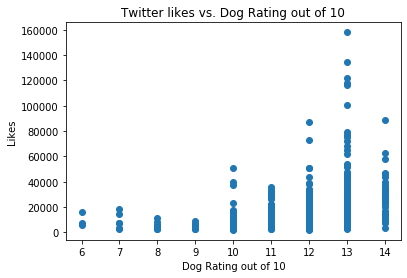

In [823]:
plt.scatter(df['rat_num'], df['likes']);
plt.xlabel('Dog Rating out of 10');
plt.ylabel('Likes');
plt.title('Twitter likes vs. Dog Rating out of 10');

The conclusions to this analysis are discussed in **'act_report'**.

### Frequency that the dog predicter AI guesses something that is not a dog on the first guess
> In this section we'll create a logistic regression model to test how statistically significant the guessing confidence is in determining whether or not the guess is a dog.

In [824]:
df = pd.read_sql_query('SELECT p1_conf, p1_dog FROM twitter_archive_master', engine)
df.head()

,p1_conf,p1_dog
0,0.097049,0
1,0.323581,1
2,0.716012,1
3,0.170278,0
4,0.555712,1


In [825]:
df = df.dropna()

In [826]:
df['intercept'] = 1

In [827]:
logit_mod = sm.Logit(df['p1_dog'], df[['intercept', 'p1_conf']])

In [828]:
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.504890
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 p1_dog   No. Observations:                  832
Model:                          Logit   Df Residuals:                      830
Method:                           MLE   Df Model:                            1
Date:                Fri, 28 Feb 2020   Pseudo R-squ.:                0.006068
Time:                        13:55:05   Log-Likelihood:                -420.07
converged:                       True   LL-Null:                       -422.63
Covariance Type:            nonrobust   LLR p-value:                   0.02353
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9010      0.213      4.236      0.000       0.484       1.318
p1_conf        0.7389      0.327      2.262      0.024       0.099       1.379
==============================================================================
"""

### Relationship between dog type and the number of retweets

> In this section we shall use a mulitple linear regression model to assess the factos affecting the number of retweets produced.

In [829]:
df = pd.read_sql_query('SELECT dog_type, retweet_count FROM twitter_archive_master', engine)
df.head()

,dog_type,retweet_count
0,None,7786.0
1,None,5766.0
2,None,3818.0
3,None,7956.0
4,None,8590.0


In [830]:
df = df.dropna()
df.dog_type.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo/floofer',
       'doggo/pupper'], dtype=object)

In [831]:
df[['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo/floofer', 'doggo/pupper']] = pd.get_dummies(df['dog_type'])

In [832]:
df['intercept'] =1

In [833]:
x = sm.OLS(df['retweet_count'], df[['doggo', 'puppo', 'pupper', 'floofer']])
results = x.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          retweet_count   R-squared (uncentered):                   0.075
Model:                            OLS   Adj. R-squared (uncentered):              0.071
Method:                 Least Squares   F-statistic:                              16.80
Date:                Fri, 28 Feb 2020   Prob (F-statistic):                    3.02e-13
Time:                        13:55:06   Log-Likelihood:                         -8548.4
No. Observations:                 832   AIC:                                  1.710e+04
Df Residuals:                     828   BIC:                                  1.712e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
doggo       7219.9138    923.160      7.821      0.000    5407.904    9031.923
puppo       3086.0000   7030.579      0.439      0.661   -1.07e+04    1.69e+04
pupper      4089.8750   2485.685      1.645      0.100    -789.110    8968.860
floofer     5066.6667   2870.222      1.765      0.078    -567.100    1.07e+04
==============================================================================
Omnibus:                      877.147   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57767.059
Skew:                           4.929   Prob(JB):                         0.00
Kurtosis:                      42.613   Cond. No.                         7.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Most Common Dog Name
> In this section we shall assess which is the most commonly predicted dog name, a histogram shall be plotted to display this

In [841]:
df = pd.read_sql_query('SELECT name FROM twitter_archive_master', engine)
df.head()

,name
0,Phineas
1,Tilly
2,Archie
3,Darla
4,Franklin


In [842]:
df.name.value_counts()

None       176
Tucker       7
Cooper       6
Charlie      6
Bo           5
          ... 
Gustav       1
Dido         1
Georgie      1
Chelsea      1
Severus      1
Name: name, Length: 488, dtype: int64

In [843]:
df = df.drop(df[df['name'] == 'None'].index)

In [846]:
# To ensure our histogram is readable we shall drop any names with fewer than 7 occurances
df = df.groupby('name').filter(lambda x : len(x) > 4)
df.name.value_counts()

Tucker     7
Charlie    6
Cooper     6
Penny      5
Winston    5
Bo         5
Oliver     5
Name: name, dtype: int64

Text(0.5, 0, 'Dog Name')

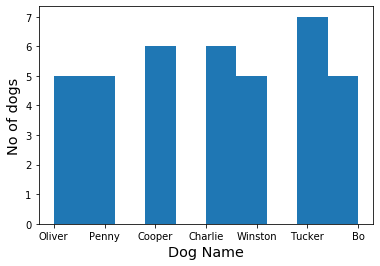

In [847]:
plt.hist(df.name);
plt.ylabel('No of dogs', size='x-large')
plt.xlabel('Dog Name', size= 'x-large')